In [276]:
reload("GynC")

In [324]:
ts = [3,5]
#ts = [1,1.7] * sqrt(6/.7)
m = GynC.Federn.federmodel(ts = ts, xmax=50, nx=200, zmult=300, rho=1.5)

GynC.LikelihoodModel([1.0,1.24623,1.49246,1.73869,1.98492,2.23116,2.47739,2.72362,2.96985,3.21608  …  47.7839,48.0302,48.2764,48.5226,48.7688,49.0151,49.2613,49.5075,49.7538,50.0],Array{Float64,1}[[-3.39178,4.53283],[-2.02152,6.50268],[-0.744985,7.97363],[0.441326,9.00437],[1.54097,9.64897],[2.55738,9.95716],[3.49387,9.9746],[4.35363,9.74311],[5.13994,9.30091],[5.85575,8.68287]  …  [5.74643,-0.268911],[5.92335,0.0941372],[6.09703,0.456133],[6.26739,0.816611],[6.4344,1.17511],[6.59798,1.53119],[6.75808,1.88441],[6.91464,2.23434],[7.06763,2.58054],[7.21701,2.92262]],Array{Float64,1}[[-4.16531,0.814645],[-0.783022,8.45806],[-1.86449,8.39342],[0.664439,6.59971],[0.29646,10.7346],[3.80027,11.1502],[1.11473,10.6022],[3.83946,8.49159],[1.6776,6.32282],[5.5229,7.2177]  …  [5.63652,0.175643],[6.69643,-1.23126],[7.39894,-1.47071],[6.23745,1.34325],[6.82867,1.94827],[6.28404,0.140801],[4.72365,4.65303],[7.51992,5.26494],[7.62296,1.35382],[5.72325,0.755023]],Any[],ZeroMeanIsoNormal(
dim: 2
μ: [0.0

In [325]:
w0 = GynC.uniformweights(m);


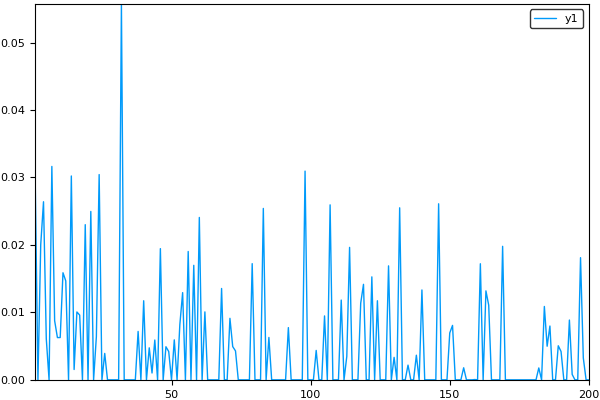

In [328]:
wz = GynC.Federn.betaprior(m)
wz = GynC.mple(m, wz, 1001, 1, 1)[end]
wz = GynC.mple(m, wz, 1001, 1, 0.3)[end]
#wz = GynC.mple(m, wz, 1001, 1, 0.01)[end]
plot(wz)


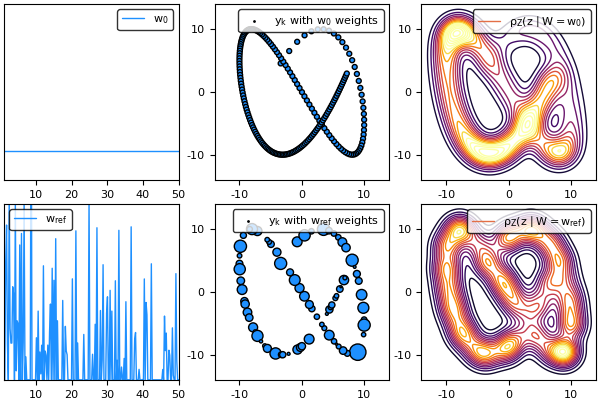

In [335]:
function scatter(ys::Vector{Vector{Float64}}; kwargs...)
  m = hcat(ys...)                                      
  scatter(m[1,:], m[2,:]; kwargs...)                   
end                                                                                                                                                                        

kdesigma = 1.5    
ms = 2
dlims = (0,0.03)
lims = (-14,14)  
clims = (0,0.004)                                                                                                   

msscale = length(m.ys) * ms                                                                                                                                                                  

p = []
labels = [[L"$w_0$", L"$y_k \ \mathrm{with} \  w_0  \ \mathrm{weights}$", L"$\rho_Z(z \mid W=w_0)$"], [L"$w_{\rm ref}$", L"$y_k \ \mathrm{with} \ w_{\rm ref} \ \mathrm{weights}$", L"$\rho_Z(z \mid W=w_{\rm ref})$"]]
for (w,l) in zip([w0, wz], labels)
  push!(p, plot(m.xs, w, label=l[1], ylims=dlims, linewidth=1, color=:dodgerblue, yticks=false))
  tmp = scatter([[NaN,NaN]], label=l[2])
  push!(p, scatter!(tmp, unfoldcols(m.ys)..., ms=sqrt(w)*msscale/8, lims=lims, label="", color=:dodgerblue))
  push!(p, plot_kde(m.ys, w, bandwidth=kdesigma, lims=lims, clims=clims, cbar=false, label=l[3], legend=true))                                                                       
  plot!(p[end], [1],[1], ms=0, label=l[3])
end
plot(p..., layout=(2,3))#, legendfont = font(18))

In [336]:
savefig("2dcounterex.pdf")